In [1]:
import pandas as pd
import csv
import geopandas as gpd
import os
import numpy as np
import joblib
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import NuSVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from numpy import hstack
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics

# data = pd.read_csv("Train_full_attri.csv")

In [2]:
X_train=pd.read_csv('SaveModel/X_train.csv').drop(columns=['Unnamed: 0']).to_numpy()
X_test=pd.read_csv('SaveModel/X_test.csv').drop(columns=['Unnamed: 0']).to_numpy()
y_train=pd.read_csv('SaveModel/y_train.csv').drop(columns=['Unnamed: 0']).to_numpy()
y_test=pd.read_csv('SaveModel/y_test.csv').drop(columns=['Unnamed: 0']).to_numpy()

X = data.iloc[:, 1:-1]
y= data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.to_csv('SaveModel/X_train.csv')
X_test.to_csv('SaveModel/X_test.csv')
y_train.to_csv('SaveModel/y_train.csv')
y_test.to_csv('SaveModel/y_test.csv')

In [3]:
rf = RandomForestClassifier(
    n_estimators = 100,
    max_features = 'auto',
    min_samples_split =10,
    min_samples_leaf =4,
    bootstrap = True)
#rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
roc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
acc = accuracy_score(y_test,y_pred)
print(acc)
print(roc)


0.8875
0.9246218487394958


<ipython-input-3-52597f00a9d4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [19]:
rf_result = []
rf_roc = []
rf_acc = []
for i in range(30):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    prob = rf.predict_proba(X_test)[:, 1]
    rf_result.append(prob)
    roc = roc_auc_score(y_test, prob)
    acc = accuracy_score(y_test,y_pred)
    rf_roc.append(roc)
    rf_acc.append(acc)
print(roc)

<ipython-input-19-bc7d162d786b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-19-bc7d162d786b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-19-bc7d162d786b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-19-bc7d162d786b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
<ipython-input-19-bc7d162d786b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.9296638655462185


In [20]:
print('max roc',max(rf_roc),
        'max acc',max(rf_acc))
rf_max_result = rf_result[rf_roc.index(max(rf_roc))]

max roc 0.9367226890756302 max acc 0.9041666666666667


In [52]:
rf_acc[rf_roc.index(max(rf_roc))]

0.8958333333333334

In [24]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
acc=accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_test, NB.predict_proba(X_test)[:, 1])
print(acc)
print(roc)
NB_pred = NB.predict_proba(X_test)[:, 1]

0.6791666666666667
0.8336974789915966


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = SVC(C=1,gamma='auto', probability=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc=accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(acc)
print(roc)
SVC_pred = clf.predict_proba(X_test)[:, 1]

C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7833333333333333
0.6378571428571428


In [26]:
from sklearn.svm import NuSVC

Linear = make_pipeline(StandardScaler(),
                       NuSVC(nu=0.15,probability=True))
Linear.fit(X_train,y_train)
y_pred = Linear.predict(X_test)
acc=accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_test, Linear.predict_proba(X_test)[:, 1])
print(acc)
print(roc)
NuSVC_pred = Linear.predict_proba(X_test)[:, 1]

0.8041666666666667
0.8383193277310924


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
ab_result = []
ab_roc = []
ab_acc = []
for i in range(30):
    adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=400)
    adb.fit(X_train,y_train)

    y_pred = adb.predict(X_test)
    prob = adb.predict_proba(X_test)[:, 1]
    ab_result.append(prob)
    roc = roc_auc_score(y_test, prob)
    ab_roc.append(roc)
    acc = accuracy_score(y_test,y_pred)
    ab_acc.append(acc)
print(roc)

C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

0.9023529411764706


In [28]:
print('max roc',max(ab_roc),
        'max acc',max(ab_acc))
ab_max_result = ab_result[ab_roc.index(max(ab_roc))]

max roc 0.934705882352941 max acc 0.8875


In [53]:
ab_acc[ab_roc.index(max(ab_roc))]

0.8833333333333333

filename = 'SaveModel1/ADBoost.sav'
pickle.dump(clf, open(filename, 'wb'))

In [29]:
import xgboost as xgb
xgbo = xgb.XGBClassifier(objective="binary:logistic", max_depth =3,n_estimators=200)
xgbo.fit(X_train,y_train)

y_pred = xgbo.predict(X_test)
acc=accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_test, xgbo.predict_proba(X_test)[:, 1])
print(acc)

print(roc)

0.8791666666666667
0.9175630252100841


In [30]:
XGB_pred = xgbo.predict_proba(X_test)[:, 1]

In [33]:
clf = LogisticRegression(C=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc=accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(acc)
print(roc)
LOG_pred = clf.predict_proba(X_test)[:, 1]

0.8416666666666667
0.8322689075630252


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc=accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print(acc,roc)
knn_pred=knn.predict_proba(X_test)[:, 1]

0.6916666666666667 0.6886974789915966


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
estimators = [ #('svm',make_pipeline(StandardScaler(),NuSVC(nu=0.15,probability=True))),
                 #('NB',GaussianNB()),
              #('KNN',KNeighborsClassifier(n_neighbors=2)),
              ('rf', RandomForestClassifier()),
              ('adb',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=400)),
              #('xgb',xgb.XGBClassifier(objective="binary:logistic", max_depth =3,n_estimators=200)),
            #("gbt",GradientBoostingClassifier(n_estimators=76,learning_rate=1.0,max_depth=1))
               #('log',LogisticRegression())
             ]
stacking = StackingClassifier(            
    estimators, final_estimator =LogisticRegression())
stacking.fit(X_train,y_train)
y_pred = stacking.predict(X_test)
roc = roc_auc_score(y_test, stacking.predict_proba(X_test)[:, 1])
acc = accuracy_score(y_test,y_pred)
print(acc)
print(roc)


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8916666666666667
0.9297478991596639


In [36]:
st_result = []
st_roc = []
st_acc = []
for i in range(30):
    stacking = StackingClassifier(            
    estimators, final_estimator =LogisticRegression())
    stacking.fit(X_train,y_train)
    y_pred = stacking.predict(X_test)
    prob = stacking.predict_proba(X_test)[:, 1]
    st_result.append(prob)
    roc = roc_auc_score(y_test, stacking.predict_proba(X_test)[:, 1])
    st_roc.append(roc)
    acc = accuracy_score(y_test,y_pred)
    st_acc.append(acc)


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array

C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array

In [37]:
print('max roc',max(st_roc),
        'max acc',max(st_acc))
st_max_result = st_result[st_roc.index(max(st_roc))]

max roc 0.9431932773109244 max acc 0.9


In [54]:
st_acc[st_roc.index(max(st_roc))]

0.9

In [70]:
from statistics import stdev

In [71]:
print(sum(st_roc)/len(st_roc))
print(stdev(st_roc))

0.9335518207282913
0.004795476005234203


In [72]:
print(sum(bl_roc)/len(bl_roc))
print(stdev(bl_roc))

0.9326918767507002
0.005307897569663093


In [73]:
print(sum(rf_roc)/len(rf_roc))
print(stdev(rf_roc))

0.9292324929971987
0.005098256008671099


In [74]:
print(sum(ab_roc)/len(ab_roc))
print(stdev(ab_roc))

0.9154649859943977
0.00811371239783336


In [75]:
print(sum(st_acc)/len(st_acc))
print(stdev(st_acc))

0.8949999999999997
0.0035287543524158004


In [76]:
print(sum(bl_acc)/len(bl_acc))
print(stdev(bl_acc))

0.894583333333333
0.004259033671631641


In [77]:
print(sum(rf_acc)/len(rf_acc))
print(stdev(rf_acc))

0.8952777777777775
0.003748137042573366


In [78]:
print(sum(ab_acc)/len(ab_acc))
print(stdev(ab_acc))

0.8718055555555556
0.009581979747818903


filename = 'SaveModel/LOG2.sav'
pickle.dump(stacking, open(filename, 'wb'))

filename = 'SaveModel/SVM2.sav'
pickle.dump(stacking, open(filename, 'wb'))

In [38]:
def get_models():
    models = list()
    models.append(('rf', RandomForestClassifier()))
    models.append(('adb',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=400)))
    #models.append(('xgb',xgb.XGBClassifier(objective="binary:logistic", max_depth =3,n_estimators=30)))
    #models.append(('log',LogisticRegression()))
    return models

def fit_ensemble(models, X_train, X_val, y_train, y_val):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train, y_train)
        # predict on hold out set
        yhat = model.predict_proba(X_val)[:, 1]
        ypred = model.predict(X_val)
        #print(name)
        #print(accuracy_score(y_val, ypred), roc_auc_score(y_val, yhat))
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
 # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict_proba(X_test)[:, 1]
 # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
	# predict
    return blender.predict_proba(meta_X)[:, 1]

models = get_models()
blender = fit_ensemble(models, X_train, X_test, y_train, y_test)
blender_prediction = predict_ensemble(models, blender, X_test)
y_pred = blender_prediction>0.5
y_pred = [int(x) for x in y_pred]
acc = accuracy_score(y_test,y_pred)

roc = roc_auc_score(y_test, blender_prediction)
print(acc,roc)

<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8916666666666667 0.9307563025210084


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
bl_acc = []
bl_roc = []
bl_result = []
for i in range(30):
    models = get_models()
    model = fit_ensemble(models, X_train, X_test, y_train, y_test)
    blender_prediction = predict_ensemble(models, model, X_test)
    y_pred = blender_prediction>0.5
    y_pred = [int(x) for x in y_pred]
    bl_result.append(blender_prediction)

    acc = accuracy_score(y_test,y_pred)
    bl_acc.append(acc)
    roc = roc_auc_score(y_test, blender_prediction)
    bl_roc.append(roc)
    print(roc)

<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9384033613445378


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9311764705882353


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9396638655462185


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.923109243697479


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9342857142857143


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9332773109243698


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.930924369747899


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9359663865546218


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9328571428571428


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9378151260504202


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9316806722689075


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.931764705882353


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9363865546218487


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9171428571428573


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9382352941176471


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.93


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9297478991596639


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9389915966386554


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9292436974789916


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9365546218487395


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9310084033613445


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9370588235294118


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9378991596638656


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.925798319327731


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9311764705882353


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9335294117647059


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9227731092436975


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9357983193277312


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-38-ae7508d30235>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9314285714285714


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9370588235294117


C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print('max roc',max(bl_roc),
        'max acc',max(bl_acc))
bl_max_result = bl_result[bl_roc.index(max(bl_roc))]

max roc 0.9396638655462185 max acc 0.9041666666666667


In [56]:
bl_acc[bl_roc.index(max(bl_roc))]

0.8958333333333334

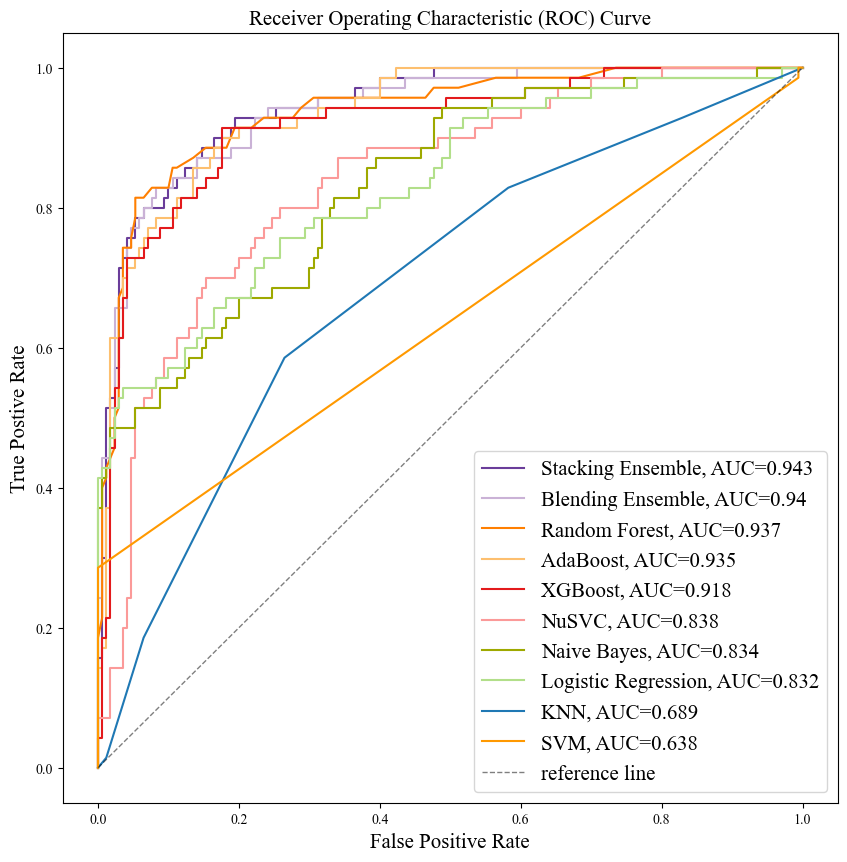

In [100]:
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(10,10)) .clf()
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
#          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#fit logistic regression model and plot ROC curve
colors = ['#6a3d9a', '#cab2d6', '#ff7f00', '#fdbf6f', '#e31a1c',
          '#fb9a99', '#9ea900', '#b2df8a', '#1f78b4', '#ff9900']

fpr, tpr, _ = metrics.roc_curve(y_test, st_max_result)
auc = round(metrics.roc_auc_score(y_test, st_max_result), 3)
plt.plot(fpr,tpr,color=colors[0],label="Stacking Ensemble, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, bl_max_result)
auc = round(metrics.roc_auc_score(y_test, bl_max_result), 3)
plt.plot(fpr,tpr,color=colors[1],label="Blending Ensemble, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, rf_max_result)
auc = round(metrics.roc_auc_score(y_test, rf_max_result), 3)
plt.plot(fpr,tpr,color=colors[2],label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, ab_max_result)
auc = round(metrics.roc_auc_score(y_test, ab_max_result), 3)
plt.plot(fpr,tpr,color=colors[3],label="AdaBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, XGB_pred)
auc = round(metrics.roc_auc_score(y_test, XGB_pred), 3)
plt.plot(fpr,tpr,color=colors[4],label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, NuSVC_pred)
auc = round(metrics.roc_auc_score(y_test, NuSVC_pred), 3)
plt.plot(fpr,tpr,color=colors[5],label="NuSVC, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, NB_pred)
auc = round(metrics.roc_auc_score(y_test, NB_pred), 3)
plt.plot(fpr,tpr,color=colors[6],label="Naive Bayes, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, LOG_pred)
auc = round(metrics.roc_auc_score(y_test, LOG_pred), 3)
plt.plot(fpr,tpr,color=colors[7],label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, knn_pred)
auc = round(metrics.roc_auc_score(y_test, knn_pred), 3)
plt.plot(fpr,tpr,color=colors[8],label="KNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, SVC_pred)
auc = round(metrics.roc_auc_score(y_test, SVC_pred), 3)
plt.plot(fpr,tpr,color=colors[9],label="SVM, AUC="+str(auc))
plt.plot([0,1], [0,1], '--',color = 'k',alpha = 0.5, linewidth=1,label = 'reference line')

#add legend
plt.legend(fontsize=15)
plt.xlabel("False Positive Rate",size=15)
plt.ylabel("True Postive Rate",size=15)
plt.title('Receiver Operating Characteristic (ROC) Curve',size=15)
plt.show()

In [50]:
rocdata = pd.read_csv("SaveModel/roc.csv")
accdata = pd.read_csv("SaveModel/acc.csv")


In [65]:
pd.DataFrame(bl_result).to_csv("SaveModel/blresult.csv")

In [47]:
rocdata = pd.DataFrame()
rocdata['Stacking'] = st_roc
rocdata['Blending'] = bl_roc
rocdata['RF'] = rf_roc
rocdata['AdaBoost'] = ab_roc

rocdata.to_csv("SaveModel/roc.csv")
accdata = pd.DataFrame()
accdata['Stacking'] = st_acc
accdata['Blending'] = bl_acc
accdata['RF'] = rf_acc
accdata['AdaBoost'] = ab_acc
accdata.to_csv("SaveModel/acc.csv")


<ipython-input-108-2f5dab80098e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Stacking', 'Blending','Random Forest', 'AdaBoost'],size =20)


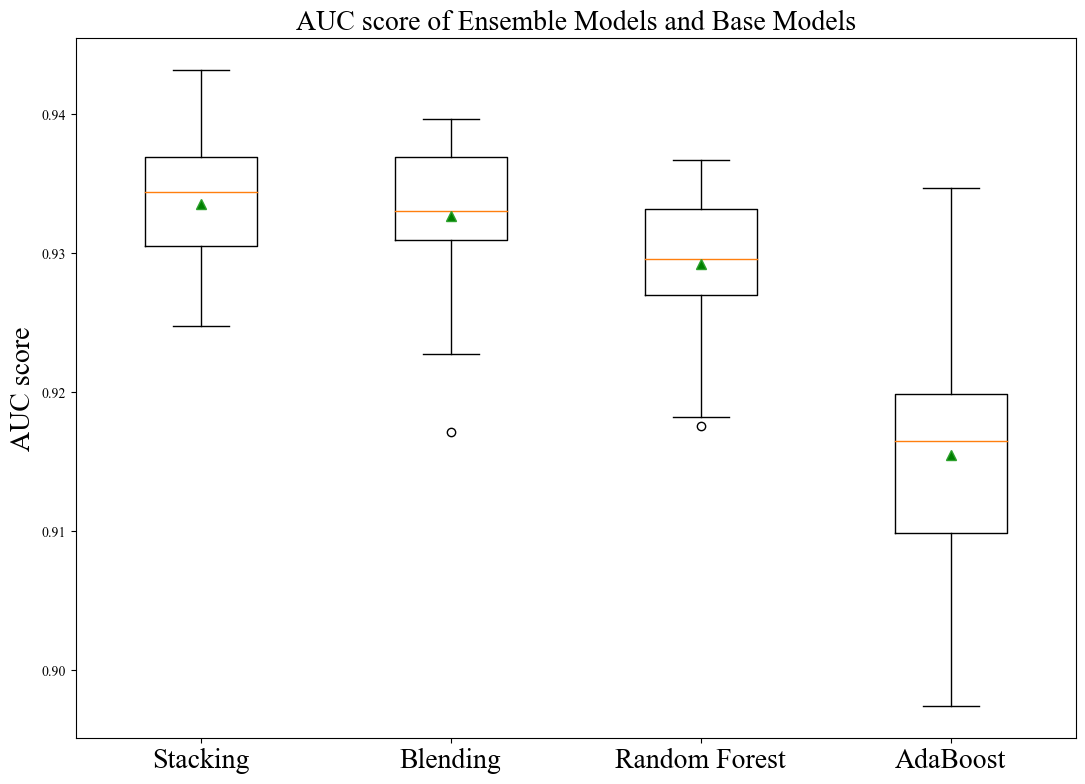

In [108]:
data_1 = rocdata['Stacking'].to_numpy()
data_2 = rocdata.Blending.to_numpy()
data_3 = rocdata.RF.to_numpy()
data_4 = rocdata.AdaBoost.to_numpy()
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Stacking', 'Blending','Random Forest', 'AdaBoost'],size =20)
ax.set_ylabel("AUC score",size = 20)
plt.title("AUC score of Ensemble Models and Base Models",size =20)

# Creating plot
ax.boxplot(data,showmeans=True,meanprops=dict(marker='^', markerfacecolor='green', markersize=7))
# show plot
plt.show()


<ipython-input-109-c8f51f503481>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Stacking', 'Blending','Random Forest', 'AdaBoost'],size =20)


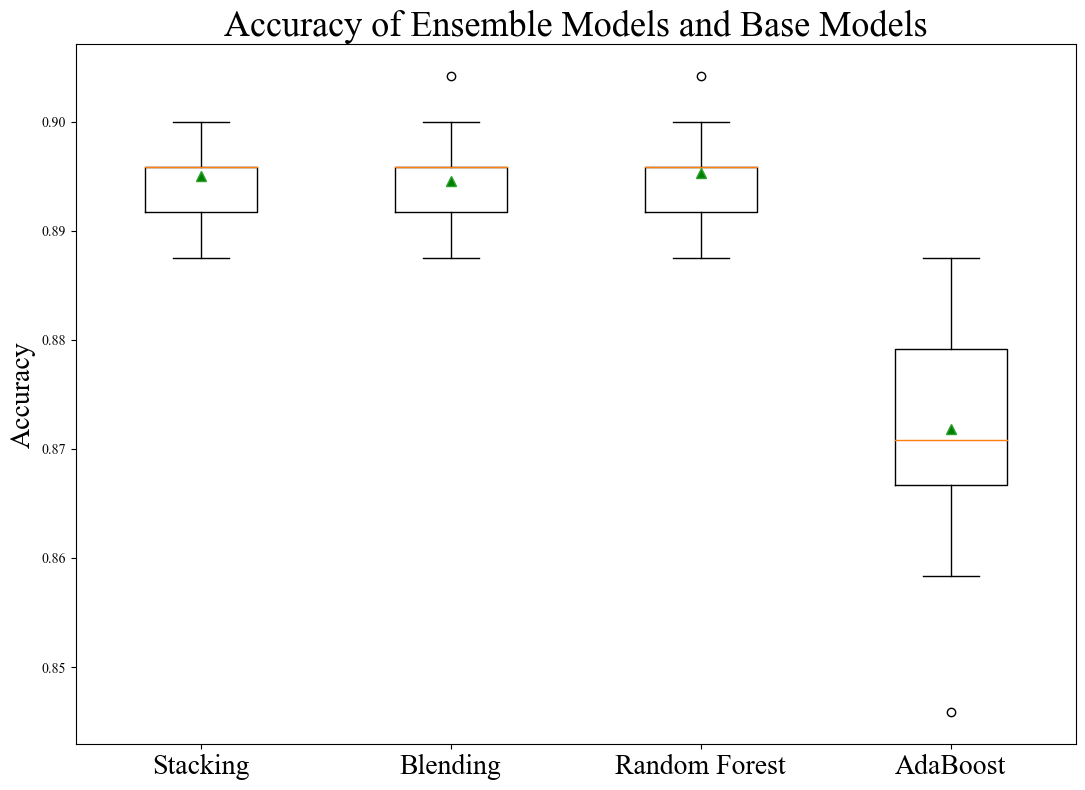

In [109]:
data_1 = accdata['Stacking'].to_numpy()
data_2 = accdata.Blending.to_numpy()
data_3 = accdata.RF.to_numpy()
data_4 = accdata.AdaBoost.to_numpy()
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Stacking', 'Blending','Random Forest', 'AdaBoost'],size =20)
ax.set_ylabel("Accuracy",size = 20)
plt.title("Accuracy of Ensemble Models and Base Models",size=26)

# Creating plot
ax.boxplot(data,showmeans=True,meanprops=dict(marker='^', markerfacecolor='green', markersize=7))
# show plot
plt.show()


In [87]:
path =r"C:\Users\10125\OneDrive - UW-Madison\22 Summer\arcgis_data\dem6point.shp"
file = gpd.read_file(path)
file

,FID_1,Aspect,Curvature,dem,dis2riv,dis2road,FVC,landcover,precipit,Slope,TRI,TWI,RoadClass2,RoadClass1,Traffic,Population,geometry
0,2294,284.744,-0.111111,80,7647.23,180.0000,0.635836,20,378.295428,6.09459,6.00000,7.24768,-9999,0,-9999,-9999.0000,POINT (116.08000 39.80167)
1,2295,285.945,0.222222,82,7676.31,180.0000,0.635836,20,378.295428,4.52436,4.89898,5.93787,-9999,0,-9999,-9999.0000,POINT (116.08028 39.80167)
2,2296,282.995,-0.222222,84,7705.39,180.0000,0.658358,20,378.547558,4.14709,4.35890,7.81703,-9999,0,-9999,-9999.0000,POINT (116.08056 39.80167)
3,2297,282.995,-0.222222,85,7705.39,180.0000,0.650292,20,378.547558,4.14709,4.35890,7.81703,-9999,0,-9999,-9999.0000,POINT (116.08083 39.80167)
4,2298,273.814,-0.000000,87,7763.57,174.9290,0.636515,20,378.547558,4.67072,4.58258,7.00450,-9999,0,-9999,-9999.0000,POINT (116.08111 39.80167)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880195,1879595,0.000,-0.000000,41,10803.50,134.1640,0.660371,80,372.430568,2.50099,2.44949,7.91840,-9999,0,-9999,24.1262,POINT (116.23861 40.12500)
1880196,1879596,333.435,-0.111111,41,10789.50,108.1670,0.671148,80,372.430568,2.79575,3.00000,9.05959,-9999,0,-9999,21.7829,POINT (116.23889 40.12500)
1880197,1879597,292.380,-0.333333,42,10789.50,108.1670,0.683953,80,372.430568,5.73198,6.00000,7.08631,-9999,0,-9999,21.7829,POINT (116.23917 40.12500)
1880198,1879598,280.305,0.555556,46,10775.50,84.8528,0.683953,80,372.430568,6.96049,7.81025,5.50424,1,1,-9999,21.7829,POINT (116.23944 40.12500)


In [88]:
file["Traffic"] = file["Traffic"].clip(lower =0)
file["Population"] = file["Population"].clip(lower =0)
#data["RoadClass2"] = data["RoadClass2"].clip(lower =0)
#data["RoadClass1"] = data["RoadClass1"].clip(lower =0)
file = file.drop(columns=['RoadClass2','RoadClass1'])
predict_attribute = file.iloc[:,1:-1]

In [89]:
file

,FID_1,Aspect,Curvature,dem,dis2riv,dis2road,FVC,landcover,precipit,Slope,TRI,TWI,Traffic,Population,geometry
0,2294,284.744,-0.111111,80,7647.23,180.0000,0.635836,20,378.295428,6.09459,6.00000,7.24768,0,0.0000,POINT (116.08000 39.80167)
1,2295,285.945,0.222222,82,7676.31,180.0000,0.635836,20,378.295428,4.52436,4.89898,5.93787,0,0.0000,POINT (116.08028 39.80167)
2,2296,282.995,-0.222222,84,7705.39,180.0000,0.658358,20,378.547558,4.14709,4.35890,7.81703,0,0.0000,POINT (116.08056 39.80167)
3,2297,282.995,-0.222222,85,7705.39,180.0000,0.650292,20,378.547558,4.14709,4.35890,7.81703,0,0.0000,POINT (116.08083 39.80167)
4,2298,273.814,-0.000000,87,7763.57,174.9290,0.636515,20,378.547558,4.67072,4.58258,7.00450,0,0.0000,POINT (116.08111 39.80167)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880195,1879595,0.000,-0.000000,41,10803.50,134.1640,0.660371,80,372.430568,2.50099,2.44949,7.91840,0,24.1262,POINT (116.23861 40.12500)
1880196,1879596,333.435,-0.111111,41,10789.50,108.1670,0.671148,80,372.430568,2.79575,3.00000,9.05959,0,21.7829,POINT (116.23889 40.12500)
1880197,1879597,292.380,-0.333333,42,10789.50,108.1670,0.683953,80,372.430568,5.73198,6.00000,7.08631,0,21.7829,POINT (116.23917 40.12500)
1880198,1879598,280.305,0.555556,46,10775.50,84.8528,0.683953,80,372.430568,6.96049,7.81025,5.50424,0,21.7829,POINT (116.23944 40.12500)


#Prediction phase
path =r"C:\Users\10125\OneDrive - UW-Madison\22 Summer\arcgis_data\dem6point.shp"
file = gpd.read_file(path)
file = pd.DataFrame(file)
file["Traffic"] = file["Traffic"].clip(lower =0)
predict_attribute = file.iloc[:,2:-1]

In [109]:
for i in range(10,49,5):
    adb = xgb.XGBClassifier(objective="binary:logistic", max_depth =3,n_estimators=i)
    adb.fit(X_train,y_train)
    roc = roc_auc_score(y_test, adb.predict_proba(X_test)[:, 1])
    print(i,roc)
    prediction = adb.predict_proba(predict_attribute)
    file['label'] = prediction[:,1]
    path = r"C:\Users\10125\OneDrive - UW-Madison\22 Summer\ADBOOST\XGB3_"+str(i)+".shp"
    file.to_file(path)

10 0.8624282694050136
15 0.8738296587133796
20 0.8778314708547267
25 0.8812292358803987
30 0.8795681063122923
35 0.8796436122017518
40 0.8824373301117487
45 0.8762458471760797


In [103]:
# prediction = xgbo.predict_proba(predict_attribute)
# file['label'] = prediction[:,1]
prediction = adb.predict_proba(predict_attribute)[:, 1]
file['label'] = prediction

C:\ProgramData\Anaconda3\envs\arcgis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [98]:
file['label'] = prediction

In [104]:
file

,geometry,label
0,POINT (116.08000 39.80167),0.288679
1,POINT (116.08028 39.80167),0.209124
2,POINT (116.08056 39.80167),0.289891
3,POINT (116.08083 39.80167),0.289891
4,POINT (116.08111 39.80167),0.261882
...,...,...
1880195,POINT (116.23861 40.12500),0.292536
1880196,POINT (116.23889 40.12500),0.254374
1880197,POINT (116.23917 40.12500),0.211926
1880198,POINT (116.23944 40.12500),0.203958


In [93]:
drop_col = ['FID_1',
 'Aspect',
 'Curvature',
 'dem',
 'dis2riv',
 'dis2road',
 'FVC',
 'landcover',
 'precipit',
 'Slope',
 'TRI',
 'TWI',
 'Traffic',
 'Population']
file = file.drop(columns=drop_col)
file

,geometry,label
0,POINT (116.08000 39.80167),0.062596
1,POINT (116.08028 39.80167),0.058712
2,POINT (116.08056 39.80167),0.060548
3,POINT (116.08083 39.80167),0.060548
4,POINT (116.08111 39.80167),0.061574
...,...,...
1880195,POINT (116.23861 40.12500),0.066218
1880196,POINT (116.23889 40.12500),0.086135
1880197,POINT (116.23917 40.12500),0.068885
1880198,POINT (116.23944 40.12500),0.052229


In [105]:
path = r"C:\Users\10125\OneDrive - UW-Madison\22 Summer\prediction\ADB.shp"
file.to_file(path)

In [ ]:
import arcpy
arcpy.conversion.PointToRaster(
   r"C:\Users\10125\OneDrive - UW-Madison\22 Summer\prediction\predict330Log2.shp",
    "label",
    r"C:\Users\10125\OneDrive - UW-Madison\22 Summer\prediction\predict330Log2.tif",
    "MAXIMUM", "NONE", 0.000277777778)